Emovectors

# Emovectors - Measuring emotional content in music



This notebook uses librosa, pandas, numpy, statistics

In [1]:

#%pip install librosa
#%pip install midi2audio
#%pip install pandas
#%pip install numpy
#%pip install statistics
#%pip install fluidsynth


import librosa
import pandas as pd
import numpy as np
from statistics import mean, variance, stdev
#from midi2audio import FluidSynth
#import fluidsynth

## Datastructure for use in this notebook

This notebook uses pandas data frames to store musical information

For the gtzan dataset, we use df_emo_gtzan
For the weimar Jazz dataset, we use df_emo_wjd
For the Impro-visor dataset, we use df_emo_iv

In [2]:
def set_up_df_emo():
    df_emo = pd.DataFrame(
        columns=['filename', 'y', 'sr', 'full_path', 'tempo', 'beat_frames', 'beat_times'])
    df_emo.set_index('filename')
    return df_emo


def readin_data(path, tracknames, df_emo, midi_boolean):
    ''' if midi_boolean:
        # from https://pypi.org/project/midi2audio/
        # using the default sound font in 44100 Hz sample rate
        fs = FluidSynth() '''
    for track in tracknames:
        pt = path+track    
        print(pt)
        #if midi_boolean:
        #    pt = fs.midi_to_audio(path+track, 'temp.wav')
        y, sr = librosa.load(pt)
        tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
        beat_times = librosa.frames_to_time(beat_frames, sr=sr)
        new_emo_jazz = {"filename":track, "y": y, "sr": sr, "full_path": path+track, 
                        "tempo": tempo, "beat_frames": beat_frames, "beat_times": beat_times}
        df_emo.loc[track] = new_emo_jazz
                
            

### Read in data

1. gtzan data read into df_emo_gtzan
Data in gtzan_genre/genres_original/jazz/*
tracknames: jazz.[5-digit_trackno].wav

NOT WORKING 2. weimar jazz db data read into df_emo_wjd
Data in weimarJazzDatabase/RELEASE2.0_mid_unquant/*.mid
tracknames: listed in weimarJazzDatabase/RELEASE2.0_mid_unquant/listings.txt

3. improvisor data original transcriptions read into df_emo_iv_famous
Data in improvisor-transcriptions/*.wav
tracknames: listed in improvisor-transcriptions/listings.txt

4. improvisor data bob transcriptions read into df_emo_iv_bob
Data in improvisor-transcriptions/*.wav
tracknames: listed in improvisor-transcriptions/listings3.txt

5. improvisor data improvisor-only transcriptions read into df_emo_iv_iv
Data in improvisor-transcriptions/*.wav
tracknames: improvisor-transcriptions/12BarBlues[1-8].wav


In [3]:
df_emo_gtzan = set_up_df_emo()
path = 'gtzan_genre/genres_original/jazz/'
tracknames = []
for i in range(0, 100):
    tracknames.append('jazz.'+str(i).zfill(5)+'.wav')
print(tracknames)
readin_data(path=path, tracknames=tracknames, df_emo=df_emo_gtzan, midi_boolean=False)
df_emo_gtzan.describe

['jazz.00000.wav', 'jazz.00001.wav', 'jazz.00002.wav', 'jazz.00003.wav', 'jazz.00004.wav', 'jazz.00005.wav', 'jazz.00006.wav', 'jazz.00007.wav', 'jazz.00008.wav', 'jazz.00009.wav', 'jazz.00010.wav', 'jazz.00011.wav', 'jazz.00012.wav', 'jazz.00013.wav', 'jazz.00014.wav', 'jazz.00015.wav', 'jazz.00016.wav', 'jazz.00017.wav', 'jazz.00018.wav', 'jazz.00019.wav', 'jazz.00020.wav', 'jazz.00021.wav', 'jazz.00022.wav', 'jazz.00023.wav', 'jazz.00024.wav', 'jazz.00025.wav', 'jazz.00026.wav', 'jazz.00027.wav', 'jazz.00028.wav', 'jazz.00029.wav', 'jazz.00030.wav', 'jazz.00031.wav', 'jazz.00032.wav', 'jazz.00033.wav', 'jazz.00034.wav', 'jazz.00035.wav', 'jazz.00036.wav', 'jazz.00037.wav', 'jazz.00038.wav', 'jazz.00039.wav', 'jazz.00040.wav', 'jazz.00041.wav', 'jazz.00042.wav', 'jazz.00043.wav', 'jazz.00044.wav', 'jazz.00045.wav', 'jazz.00046.wav', 'jazz.00047.wav', 'jazz.00048.wav', 'jazz.00049.wav', 'jazz.00050.wav', 'jazz.00051.wav', 'jazz.00052.wav', 'jazz.00053.wav', 'jazz.00054.wav', 'jazz.000

<bound method NDFrame.describe of                       filename  \
jazz.00000.wav  jazz.00000.wav   
jazz.00001.wav  jazz.00001.wav   
jazz.00002.wav  jazz.00002.wav   
jazz.00003.wav  jazz.00003.wav   
jazz.00004.wav  jazz.00004.wav   
...                        ...   
jazz.00095.wav  jazz.00095.wav   
jazz.00096.wav  jazz.00096.wav   
jazz.00097.wav  jazz.00097.wav   
jazz.00098.wav  jazz.00098.wav   
jazz.00099.wav  jazz.00099.wav   

                                                                y     sr  \
jazz.00000.wav  [-0.009246826, -0.011779785, -0.013702393, -0....  22050   
jazz.00001.wav  [0.0024108887, 0.005493164, 0.008666992, 0.011...  22050   
jazz.00002.wav  [0.0033569336, 0.00491333, 0.0037841797, 0.004...  22050   
jazz.00003.wav  [0.029510498, 0.048187256, 0.041900635, 0.0433...  22050   
jazz.00004.wav  [0.122039795, 0.22442627, 0.19665527, 0.171508...  22050   
...                                                           ...    ...   
jazz.00095.wav  [-0.06219

In [4]:
''' df_emo_wjd = set_up_df_emo()
path = 'weimarJazzDatabase/RELEASE2.0_mid_unquant/'
with open('weimarJazzDatabase/RELEASE2.0_mid_unquant/listings.txt', 'r') as file:
    tracknames = [track.strip() for track in file]
print(tracknames)
readin_data(path, tracknames, df_emo_wjd, True)
df_emo_wjd.describe '''

" df_emo_wjd = set_up_df_emo()\npath = 'weimarJazzDatabase/RELEASE2.0_mid_unquant/'\nwith open('weimarJazzDatabase/RELEASE2.0_mid_unquant/listings.txt', 'r') as file:\n    tracknames = [track.strip() for track in file]\nprint(tracknames)\nreadin_data(path, tracknames, df_emo_wjd, True)\ndf_emo_wjd.describe "

In [5]:
df_emo_iv_famous = set_up_df_emo()
df_emo_iv_bob = set_up_df_emo()
df_emo_iv_iv = set_up_df_emo()

path = 'improvisor-transcriptions/'
# original transcriptions
with open('improvisor-transcriptions/listings.txt', 'r') as file:
    tracknames = [track.strip() for track in file]
print(tracknames)
readin_data(path, tracknames, df_emo_iv_famous, False)

# bob transcriptions
with open('improvisor-transcriptions/listings3.txt', 'r') as file:
    tracknames = [track.strip() for track in file]
print(tracknames)
readin_data(path, tracknames, df_emo_iv_bob, False)

# impro-visor transcriptions
tracknames = []
for i in range(1, 9):
    tracknames.append('12BarBlues'+str(i)+'.wav')
print(tracknames)
readin_data(path, tracknames, df_emo_iv_iv, False)


df_emo_iv_famous.describe()
df_emo_iv_bob.describe()
df_emo_iv_iv.describe()

['AnthropologyParker.wav', 'LairdBairdParker.wav', 'LiebmanLilly.wav', 'NowsTheTimeBrown.wav', 'NowsTheTimeParker.wav', 'YardbirdSuiteParker.wav']
improvisor-transcriptions/AnthropologyParker.wav
improvisor-transcriptions/LairdBairdParker.wav
improvisor-transcriptions/LiebmanLilly.wav
improvisor-transcriptions/NowsTheTimeBrown.wav
improvisor-transcriptions/NowsTheTimeParker.wav
improvisor-transcriptions/YardbirdSuiteParker.wav
['AFoggyDaySolo.wav', 'ANightInTunisiaSolo.wav', 'AllTheThingsYouAreSolo.wav', 'AlongCameBettySolo.wav', 'BeatriceSolo.wav', 'BecauseILoveYou.wav', 'BluesForAliceSolo.wav', 'GiantSteps.wav', 'GroovinHighSolo.wav', 'NightHasAThousandEyes.wav', 'ThisIsForAlbert.wav']
improvisor-transcriptions/AFoggyDaySolo.wav
improvisor-transcriptions/ANightInTunisiaSolo.wav
improvisor-transcriptions/AllTheThingsYouAreSolo.wav
improvisor-transcriptions/AlongCameBettySolo.wav
improvisor-transcriptions/BeatriceSolo.wav
improvisor-transcriptions/BecauseILoveYou.wav
improvisor-transcr

,sr
count,8.0
mean,22050.0
std,0.0
min,22050.0
25%,22050.0
50%,22050.0
75%,22050.0
max,22050.0


## Audio features to extract for analysis:

* Tempo
* Microstructural irregularity - treated as beat irregularity
* Sound level and Sound level variability
* high frequency energy
* pitch variability
* tone attacks
* pitch contour

### get data for tempo and for microstructural irregularity (treated as beat irregularity)

In [6]:
def calc_diff(beats):
    beats_diff = [b1-b0 for b0, b1 in zip(beats[:-1], beats[1:])]
    return beats_diff

# beat_times_diff = calc_diff(beat_times)
# beat_frames_diff = calc_diff(beat_frames)


def check_diff(beats, beats_diff):
    for i in range(0, 10):
        print(beats[i+1]-beats[i], beats[i], beats[i+1])
        print(beats_diff[i])


# check_diff(beat_frames, beat_frames_diff)
# check_diff(beat_times, beat_times_diff)

# print(tempo)
# print(mean(beat_times_diff))
# print(variance(beat_times_diff))
# print(mean(beat_frames_diff))
# print(variance(beat_frames_diff))


### get data for Sound level and Sound level variability

In [7]:
def calc_loudness(y):
    rms = librosa.feature.rms(y=y)[0] 
    converted_rms=rms.astype(np.float64)
    return converted_rms

 # https://groups.google.com/g/librosa/c/B5XDS-ex7jg?pli=1

### get data for high frequency energy

In [8]:
def calc_spectral_bandwidth(y, sr):
    #spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    return spectral_bandwidth

### get data for pitch variability

In [9]:
def calc_pitches(y, sr):
    f0 = librosa.yin(y, fmin=librosa.note_to_hz('A2'), fmax=librosa.note_to_hz('C8'), sr=sr)
    f0_voiced = f0[f0 >0]
    return f0_voiced
    

### get data for tone attacks


In [10]:
def calc_attacks(rms, sr):
    threshold = 0.1 * np.max(rms)
    attack_times = []
    for i in range(1, len(rms)):
        if rms[i-1] <= threshold and rms[i] > threshold:
            start_idx = i
            while i < len(rms) and rms[i] < np.max(rms):
                i += 1
            attack_times.append(librosa.frames_to_time(i - start_idx, sr=sr))
    return attack_times


def calc_attack_mean(attack_times):
    if len(attack_times) > 0:
        return mean(attack_times)
    else:
        return None

### get data for pitch contour
TODO - when working with monophonic data

## Calculate analysis data 

In [11]:
def populate_acoustic_cues_data(df_emo):
    df_emo['beat_times_diff'] = df_emo['beat_times'].apply(calc_diff)
    df_emo['beat_frames_diff'] = df_emo['beat_frames'].apply(calc_diff)
    df_emo['beat_times_mean'] = df_emo['beat_times_diff'].apply(mean)
    df_emo['beat_frames_mean'] = df_emo['beat_frames_diff'].apply(mean)
    df_emo['beat_times_var'] = df_emo['beat_times_diff'].apply(variance)
    df_emo['beat_frames_var'] = df_emo['beat_frames_diff'].apply(variance)
    df_emo['beat_times_sd'] = df_emo['beat_times_diff'].apply(stdev)
    # df_emo['beat_frames_sd'] = df_emo['beat_frames_diff'].apply(stdev)
    df_emo['spectral_bandwidth'] = df_emo.apply(
        lambda row: calc_spectral_bandwidth(row['y'], row['sr']), axis=1)
    df_emo['spectral_bandwidth_mean'] = df_emo['spectral_bandwidth'].apply(
        mean)
    df_emo['spectral_bandwidth_var'] = df_emo['spectral_bandwidth'].apply(
        variance)
    df_emo['spectral_bandwidth_sd'] = df_emo['spectral_bandwidth'].apply(stdev)
    df_emo['pitches'] = df_emo.apply(
        lambda row: calc_pitches(row['y'], row['sr']), axis=1)
    df_emo['pitches_mean'] = df_emo['pitches'].apply(mean)
    df_emo['pitches_var'] = df_emo['pitches'].apply(variance)
    df_emo['pitches_sd'] = df_emo['pitches'].apply(stdev)
    df_emo['loudness'] = df_emo['y'].apply(calc_loudness)
    df_emo['loudness_mean'] = df_emo['loudness'].apply(mean)
    df_emo['loudness_var'] = df_emo['loudness'].apply(variance)
    df_emo['loudness_sd'] = df_emo['loudness'].apply(stdev)
    df_emo['attack_times'] = df_emo.apply(
        lambda row: calc_attacks(row['loudness'], row['sr']), axis=1)
    df_emo['attacks_mean'] = df_emo['attack_times'].apply(
        calc_attack_mean)



In [12]:
# Calculate analysis data for gtzan data
populate_acoustic_cues_data(df_emo_gtzan)

In [13]:
# Calculate analysis data for weimar jazz db data 
#populate_acoustic_cues_data(df_emo_wjd)

In [14]:
# Calculate analysis data for improvisor data 
populate_acoustic_cues_data(df_emo_iv_famous)
populate_acoustic_cues_data(df_emo_iv_bob)


In [15]:
populate_acoustic_cues_data(df_emo_iv_iv)

In [16]:
df_emo_gtzan.describe()

,sr,beat_times_mean,beat_frames_mean,beat_times_var,beat_frames_var,beat_times_sd,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_bandwidth_sd,pitches_mean,pitches_var,pitches_sd,loudness_mean,loudness_var,loudness_sd,attacks_mean
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,79.000000
mean,22050.0,0.554446,23.440000,0.001049,1.380000,0.029436,2027.297513,110862.831062,318.565010,290.398593,1.926538e+05,344.919838,0.085461,0.001441,0.034780,9.489323
std,0.0,0.140115,6.069164,0.001045,1.968335,0.013563,571.691890,66326.139539,97.333985,119.572412,3.176287e+05,272.815591,0.045219,0.001318,0.015277,5.510652
min,22050.0,0.278407,11.000000,0.000118,0.000000,0.010846,1037.834640,17731.556133,133.159889,157.879253,3.513577e+03,59.275429,0.021177,0.000151,0.012286,0.441179
25%,22050.0,0.460571,19.000000,0.000420,0.000000,0.020493,1565.193075,61170.107356,247.324057,212.598235,1.981847e+04,140.764809,0.050104,0.000464,0.021531,5.901832
50%,22050.0,0.545574,23.000000,0.000685,1.000000,0.026173,2002.385679,99143.103732,314.869754,255.214366,6.838021e+04,261.137448,0.076906,0.001222,0.034956,8.192978
75%,22050.0,0.613600,26.000000,0.001335,2.000000,0.036531,2502.332759,144806.413130,380.526422,322.226048,2.111398e+05,459.470336,0.107801,0.001612,0.040144,11.769615
max,22050.0,0.981872,42.000000,0.006900,12.000000,0.083069,3328.871444,342282.310911,585.048982,811.820070,1.804742e+06,1343.407001,0.231722,0.008219,0.090656,27.469206


In [17]:
df_emo_iv_famous.describe()

,sr,beat_times_mean,beat_frames_mean,beat_times_var,beat_frames_var,beat_times_sd,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_bandwidth_sd,pitches_mean,pitches_var,pitches_sd,loudness_mean,loudness_var,loudness_sd,attacks_mean
count,6.0,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
mean,22050.0,0.640445,27.000000,0.000199,0.0,0.012977,2604.636273,200801.487620,446.145813,251.468069,125254.707029,346.287775,0.044775,0.000228,0.014269,68.243447
std,0.0,0.135770,5.585696,0.000172,0.0,0.006020,133.342586,42434.714037,45.896421,44.294914,59189.122493,80.046118,0.016432,0.000139,0.005358,NaN
min,22050.0,0.374953,16.000000,0.000048,0.0,0.006936,2402.800730,153057.532302,391.225680,201.043323,72126.078396,268.562988,0.024363,0.000050,0.007047,68.243447
25%,22050.0,0.655795,28.000000,0.000073,0.0,0.008541,2543.957978,178008.436680,421.800433,222.123115,89192.552601,298.635100,0.030801,0.000109,0.009951,68.243447
50%,22050.0,0.666988,28.000000,0.000123,0.0,0.010973,2597.904565,196703.648495,443.484709,243.091922,95562.045623,309.089381,0.050750,0.000265,0.016259,68.243447
75%,22050.0,0.722410,30.250000,0.000338,0.0,0.018109,2698.993567,206172.671992,454.051021,274.386324,165046.298402,403.008055,0.054279,0.000334,0.018274,68.243447
max,22050.0,0.740791,31.000000,0.000431,0.0,0.020763,2770.542093,277238.383863,526.534314,321.629945,213000.968275,461.520279,0.063182,0.000371,0.019252,68.243447


In [18]:
df_emo_iv_bob.describe()

,sr,beat_times_mean,beat_frames_mean,beat_times_var,beat_frames_var,beat_times_sd,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_bandwidth_sd,pitches_mean,pitches_var,pitches_sd,loudness_mean,loudness_var,loudness_sd,attacks_mean
count,11.0,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.000000
mean,22050.0,0.495104,21.000000,0.000166,0.0,0.011808,2526.779363,210429.280309,456.100057,313.132968,111998.155945,325.919546,0.061683,0.000316,0.017673,66.087861
std,0.0,0.139181,5.796551,0.000157,0.0,0.005361,65.815079,46985.937769,51.402528,43.651905,52277.942223,79.699848,0.002976,0.000076,0.002123,NaN
min,22050.0,0.374975,16.000000,0.000069,0.0,0.008280,2420.368517,124684.966622,353.107585,239.117015,32505.272364,180.292186,0.056507,0.000189,0.013758,66.087861
25%,22050.0,0.374990,16.000000,0.000069,0.0,0.008302,2483.791956,192460.123415,438.654691,284.129456,79260.646451,281.155477,0.060023,0.000279,0.016693,66.087861
50%,22050.0,0.375002,16.000000,0.000071,0.0,0.008425,2512.003816,212166.407141,460.615248,327.544035,104718.444414,323.602294,0.061087,0.000312,0.017662,66.087861
75%,22050.0,0.630237,27.000000,0.000211,0.0,0.014079,2572.194265,220474.222530,469.524252,331.533763,144342.914269,379.629356,0.063376,0.000331,0.018204,66.087861
max,22050.0,0.668464,28.000000,0.000486,0.0,0.022041,2647.202148,308555.950272,555.478128,376.939412,218315.305401,467.242234,0.066481,0.000473,0.021749,66.087861


In [19]:
df_emo_iv_iv.describe()

,sr,beat_times_mean,beat_frames_mean,beat_times_var,beat_frames_var,beat_times_sd,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_bandwidth_sd,pitches_mean,pitches_var,pitches_sd,loudness_mean,loudness_var,loudness_sd
count,8.0,8.000000,8.0,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,22050.0,0.668999,28.0,0.000683,0.75000,0.025748,2206.343725,155598.373013,392.577971,269.145876,33201.423251,181.611953,0.063238,0.000251,0.015797
std,0.0,0.002355,0.0,0.000236,0.46291,0.004803,7.135477,35753.283035,41.139621,7.265178,6128.606028,15.803140,0.001182,0.000041,0.001220
min,22050.0,0.665639,28.0,0.000349,0.00000,0.018680,2198.276452,135071.123289,367.520235,260.804545,27355.392158,165.394656,0.061425,0.000221,0.014864
25%,22050.0,0.667618,28.0,0.000537,0.75000,0.023051,2202.143631,142494.501080,377.480268,262.497669,31005.811743,176.048948,0.062149,0.000222,0.014910
50%,22050.0,0.669052,28.0,0.000738,1.00000,0.027157,2204.662343,143770.083281,379.170073,268.045127,32330.696411,179.807386,0.063658,0.000243,0.015594
75%,22050.0,0.671313,28.0,0.000824,1.00000,0.028703,2208.559249,146059.605812,382.160409,276.484360,32589.123396,180.523260,0.063981,0.000252,0.015861
max,22050.0,0.671407,28.0,0.001010,1.00000,0.031777,2220.731355,243407.335080,493.363289,278.432615,47541.699363,218.040591,0.064805,0.000344,0.018556


## Calculate thresholds for analysis

In [20]:
gtzan_thresholds = {}
iv_famous_thresholds = {}
iv_bob_thresholds = {}
iv_iv_thresholds = {}

def calc_thresholds(df_emo, thresholds):
    
    thresholds['slow_tempo'], thresholds['fast_tempo'] = df_emo['tempo'].quantile([0.25, 0.75])
    thresholds['low_sound_level'],thresholds['medium_high_sound_level'], thresholds['high_sound_level'] = df_emo['loudness_mean'].quantile([0.25, 0.65, 0.75])


    thresholds['little_sound_level_variability'], thresholds['much_sound_level_variability'] = df_emo['loudness_sd'].quantile([
                                                                                                        0.25, 0.75])
    thresholds['little_microstructural_irregularity'], thresholds['much_microstructural_irregularity'] = df_emo['beat_times_sd'].quantile([
                                                                                                                    0.25, 0.75])
    thresholds['little_high_frequency_energy'], thresholds['medium_high_frequency_energy'], thresholds['much_high_frequency_energy'] = df_emo['spectral_bandwidth_mean'].quantile([
                                                                                                                                            0.25, 0.5, 0.75])
    thresholds['little_pitch_variability'], thresholds['much_pitch_variability'] = df_emo['pitches_sd'].quantile([
                                                                                        0.25, 0.75])

    filtered_attacks_mean = df_emo['attacks_mean'].dropna()
    if len(filtered_attacks_mean)>0:
        thresholds['slow_tone_attacks'], thresholds['fast_tone_attacks'] = filtered_attacks_mean.quantile([
                                                                        0.25, 0.75])
    else:
        thresholds['slow_tone_attacks'] = 0 
        thresholds['fast_tone_attacks'] = 0

    # prob need to come back to this for monophonic data
    thresholds['rising_pitch_contour'] = 1
    thresholds['falling_pitch_contour'] = 0
    
calc_thresholds(df_emo_gtzan, gtzan_thresholds)
calc_thresholds(df_emo_iv_famous, iv_famous_thresholds)
calc_thresholds(df_emo_iv_bob, iv_bob_thresholds)
calc_thresholds(df_emo_iv_iv, iv_iv_thresholds)

In [21]:
def print_thresholds(thresholds):
      print("tempo: ")
      print(thresholds['slow_tempo'], thresholds['fast_tempo'])
      print("sound level: ")
      print(thresholds['low_sound_level'], thresholds['medium_high_sound_level'], thresholds['high_sound_level'])
      print("sound level variability: ")
      print(thresholds['little_sound_level_variability'], thresholds['much_sound_level_variability'])
      print("microstructural irregularity: ")
      print(thresholds['little_microstructural_irregularity'], thresholds['much_microstructural_irregularity'])
      print("high frequency energy: ")
      print(thresholds['little_high_frequency_energy'],
            thresholds['medium_high_frequency_energy'], thresholds['much_high_frequency_energy'])
      print("pitch variability: ")
      print(thresholds['little_pitch_variability'],
            thresholds['much_pitch_variability'])
      print("tone_attacks: ")
      print(thresholds['slow_tone_attacks'], thresholds['fast_tone_attacks'])
      print("pitch_contour: ")
      print(thresholds['rising_pitch_contour'],
            thresholds['falling_pitch_contour'])
      
print("***GTZAN thresholds***")
print_thresholds(gtzan_thresholds)
print("***IV-famous thresholds***")
print_thresholds(iv_famous_thresholds)
print("***IV-Bob thresholds***")
print_thresholds(iv_bob_thresholds)
print("***IV-Impro-visor thresholds***")
print_thresholds(iv_iv_thresholds)

***GTZAN thresholds***
tempo: 
[95.703125] [129.19921875]
sound level: 
0.05010434004953722 0.09516647634077 0.10780087818066775
sound level variability: 
0.021530882743357776 0.04014434849748341
microstructural irregularity: 
0.020493476051149796 0.03653088480655901
high frequency energy: 
1565.1930754992372 2002.3856785704022 2502.3327593829245
pitch variability: 
140.76480912359432 459.47033622822926
tone_attacks: 
5.901832102016433 11.769614512471655
pitch_contour: 
1 0
***IV-famous thresholds***
tempo: 
[82.83786116] [91.48959456]
sound level: 
0.03080066794335225 0.05249658467496427 0.05427913559815874
sound level variability: 
0.009950748839539477 0.018274040265373923
microstructural irregularity: 
0.008540686036938167 0.01810860530795051
high frequency energy: 
2543.957978221305 2597.9045650970656 2698.993567234951
pitch variability: 
298.63509974650447 403.00805519304697
tone_attacks: 
68.24344671201814 68.24344671201814
pitch_contour: 
1 0
***IV-Bob thresholds***
tempo: 
[95.

## Classify emotions for each track in the df - save as emovectors

In [22]:
def classify_emotion(track, thresholds):

    anger = 0
    fear = 0
    happiness = 0
    sadness = 0
    tenderness = 0
    
    # tempo: anger: fast, fear: fast, happiness: fast, sadness: slow, tenderness: slow
    if track['tempo'] > thresholds['fast_tempo']:
        anger += 1
        fear += 1
        happiness +=1
    elif track['tempo'] < thresholds['slow_tempo']:
        sadness += 1
        tenderness += 1
    
    # sound level: anger: high, fear: low, happiness: medium-high, sadness: low, tenderness: low
    if track['loudness_mean'] > thresholds['high_sound_level']:
        anger += 1
    elif track['loudness_mean'] > thresholds['medium_high_sound_level']:
        happiness += 1
    elif track['loudness_mean'] < thresholds['low_sound_level']:
        fear +=1
        sadness +=1
        tenderness +=1
        
    # sound level variability: anger: much, fear: much, happiness: na, sadness: little, tenderness: little
    if track['loudness_sd'] > thresholds['much_sound_level_variability']:
        anger += 1
        fear += 1
    elif track['loudness_sd'] < thresholds['little_sound_level_variability']:
        sadness += 1
        tenderness += 1
        
    # high-frequency energy: anger: much, fear: little, happiness: medium, sadness: little, tenderness: little
    # HIGH_FREQUENCY_ENERGY = df_emo['spectral_bandwidth_mean']
    if track['spectral_bandwidth_mean'] > thresholds['much_high_frequency_energy']:
        anger += 1
    elif track['spectral_bandwidth_mean'] < thresholds['little_high_frequency_energy']:
        fear += 1
        sadness += 1
        tenderness += 1
    else: 
        happiness += 1 # in this case, emotion comes in all cases, that's not so good?
    
    # pitch level: anger: high, fear: high, happiness: high, sadness: low, tenderness: low
    # come back to this
    
    # pitch variability: anger: much, fear: little, happiness: much, sadness: little, tenderness: little
    # PITCH_VARIABILITY = df_emo['pitches_sd'].
    if track['pitches_sd'] > thresholds['much_pitch_variability']:
        anger += 1
        happiness += 1
    elif track['pitches_sd'] < thresholds['little_pitch_variability']:
        fear += 1
        sadness += 1
        tenderness += 1
    
    # pitch contour: come back to this
    
    
    # anger: rising, fear: rising, happiness: rising, sadness: falling, tenderness: falling
    
    # tone attacks: anger: fast, fear: na, happiness: fast, sadness: slow, tenderness: slow
    if thresholds['fast_tone_attacks'] != thresholds['slow_tone_attacks'] and thresholds['fast_tone_attacks'] != 0:
        if track['attacks_mean'] > thresholds['fast_tone_attacks']:
            anger += 1
            happiness += 1
        elif track['attacks_mean'] < thresholds['slow_tone_attacks']:
            sadness += 1
            tenderness += 1

    # microstructural irregularity: anger: irregularity , fear: a lot of irregularity, 
    # happiness: very little regularity, sadness: irregularity, tenderness: regularity
        # IRREGULARITY = df_emo['beat_times_sd'
        
#print('little_microstructural_irregularity', 'much_microstructural_irregularity')
    if track['beat_times_sd'] > thresholds['much_microstructural_irregularity']:
        fear += 1
        happiness += 1
    elif track['beat_times_sd'] < thresholds['little_microstructural_irregularity']:
        tenderness += 1
    else: 
        anger += 1
        sadness += 1
        
        
    emo_vector = {'anger': anger, 'fear': fear, 'happiness': happiness, 'sadness': sadness, 'tenderness': tenderness}
    return emo_vector
    

In [23]:
#testing testing 123
# output should be
# {'anger': 1, 'fear': 2, 'happiness': 1, 'sadness': 3, 'tenderness': 2}
track = df_emo_gtzan.loc['jazz.00000.wav']

classify_emotion(track, gtzan_thresholds)

{'anger': 1, 'fear': 2, 'happiness': 1, 'sadness': 3, 'tenderness': 2}

In [24]:
def calc_emo_vectors(df_emo, thresholds):
    emo_vectors = []
    for i, track in df_emo.iterrows():
        ev = classify_emotion(track, thresholds)
        emo_vectors.append(ev)
    print(len(df_emo), len(emo_vectors))
    return emo_vectors
    
df_emo_gtzan['emo_vector'] = calc_emo_vectors(df_emo_gtzan, gtzan_thresholds)
df_emo_iv_famous['emo_vector'] = calc_emo_vectors(df_emo_iv_famous, iv_famous_thresholds)
df_emo_iv_bob['emo_vector'] = calc_emo_vectors(df_emo_iv_bob, iv_bob_thresholds)
df_emo_iv_iv['emo_vector'] = calc_emo_vectors(df_emo_iv_iv, iv_iv_thresholds)

100 100
6 6
11 11
8 8


In [25]:
# testing
# output should be 
# {'anger': 1, 'fear': 3, 'happiness': 2, 'sadness': 4, 'tenderness': 5}
# {'anger': 1, 'fear': 0, 'happiness': 0, 'sadness': 0, 'tenderness': 1}
print(df_emo_gtzan['emo_vector']['jazz.00030.wav'])
print(df_emo_gtzan['emo_vector']['jazz.00088.wav'])

#and some more
print(df_emo_gtzan['emo_vector']['jazz.00008.wav'])
print(df_emo_gtzan['emo_vector']['jazz.00004.wav'])
print(df_emo_gtzan['emo_vector']['jazz.00011.wav'])


{'anger': 1, 'fear': 3, 'happiness': 2, 'sadness': 4, 'tenderness': 5}
{'anger': 1, 'fear': 0, 'happiness': 0, 'sadness': 0, 'tenderness': 1}
{'anger': 2, 'fear': 0, 'happiness': 1, 'sadness': 1, 'tenderness': 0}
{'anger': 2, 'fear': 4, 'happiness': 1, 'sadness': 3, 'tenderness': 3}
{'anger': 1, 'fear': 2, 'happiness': 3, 'sadness': 1, 'tenderness': 1}


In [26]:
def emotional_mag(emo_vector):
    mag = emo_vector.get('anger') + emo_vector.get('fear') + emo_vector.get('happiness') + emo_vector.get('sadness') + emo_vector.get('tenderness')
    return mag

#emotional_mag(df_emo_gtzan.loc['jazz.00000.wav']['emo_vector'])
df_emo_gtzan['emotional_magnitude'] = df_emo_gtzan['emo_vector'].apply(emotional_mag)
df_emo_iv_famous['emotional_magnitude'] = df_emo_iv_famous['emo_vector'].apply(emotional_mag)
df_emo_iv_bob['emotional_magnitude'] = df_emo_iv_bob['emo_vector'].apply(emotional_mag)
df_emo_iv_iv['emotional_magnitude'] = df_emo_iv_iv['emo_vector'].apply(emotional_mag)

In [27]:
print(df_emo_gtzan['emotional_magnitude'].describe())
print(df_emo_gtzan['emotional_magnitude'].idxmax())
print(df_emo_gtzan['emotional_magnitude'].idxmin())
max = df_emo_gtzan['emotional_magnitude'].max()
min = df_emo_gtzan['emotional_magnitude'].min()
print('max '+str(max))
print(df_emo_gtzan['emotional_magnitude'][df_emo_gtzan['emotional_magnitude'] == max])
print('min '+str(min))
print(df_emo_gtzan['emotional_magnitude']
      [df_emo_gtzan['emotional_magnitude'] == min])
print(df_emo_gtzan['emotional_magnitude'][df_emo_gtzan['emotional_magnitude'] < 6])

count    100.000000
mean       8.480000
std        2.822994
min        2.000000
25%        6.750000
50%        8.000000
75%       10.000000
max       15.000000
Name: emotional_magnitude, dtype: float64
jazz.00026.wav
jazz.00088.wav
max 15
jazz.00026.wav    15
jazz.00030.wav    15
jazz.00042.wav    15
Name: emotional_magnitude, dtype: int64
min 2
jazz.00088.wav    2
Name: emotional_magnitude, dtype: int64
jazz.00008.wav    4
jazz.00013.wav    5
jazz.00022.wav    3
jazz.00023.wav    5
jazz.00025.wav    5
jazz.00066.wav    4
jazz.00067.wav    4
jazz.00079.wav    4
jazz.00083.wav    5
jazz.00088.wav    2
jazz.00092.wav    3
jazz.00095.wav    5
Name: emotional_magnitude, dtype: int64


In [28]:
print(df_emo_iv_famous['emotional_magnitude'].describe())
print(df_emo_iv_famous['emotional_magnitude'].idxmax())
print(df_emo_iv_famous['emotional_magnitude'].idxmin())

count     6.000000
mean      9.333333
std       2.422120
min       5.000000
25%       8.500000
50%      10.500000
75%      11.000000
max      11.000000
Name: emotional_magnitude, dtype: float64
AnthropologyParker.wav
NowsTheTimeParker.wav


In [29]:
print(df_emo_iv_bob['emotional_magnitude'].describe())
print(df_emo_iv_bob['emotional_magnitude'].idxmax())
print(df_emo_iv_bob['emotional_magnitude'].idxmin())

count    11.000000
mean      7.272727
std       2.686667
min       3.000000
25%       5.500000
50%       7.000000
75%       9.000000
max      11.000000
Name: emotional_magnitude, dtype: float64
AFoggyDaySolo.wav
NightHasAThousandEyes.wav


In [30]:
print(df_emo_iv_iv['emotional_magnitude'].describe())
print(df_emo_iv_iv['emotional_magnitude'].idxmax())
print(df_emo_iv_iv['emotional_magnitude'].idxmin())

count     8.000000
mean      6.625000
std       3.377975
min       2.000000
25%       4.750000
50%       6.000000
75%       8.000000
max      12.000000
Name: emotional_magnitude, dtype: float64
12BarBlues8.wav
12BarBlues7.wav


### Just for ease of access, pull the emovector values out into separate columns in the df as well

NB Code quality starting to need significant attention... refactor again soon

In [31]:
def extract_emos(emovectors):
    anger = []
    fear = []
    happiness = []
    sadness = []
    tenderness = []

    for e in emovectors:
        anger.append(e.get('anger'))
        fear.append(e.get('fear'))
        happiness.append(e.get('happiness'))
        sadness.append(e.get('sadness'))
        tenderness.append(e.get('tenderness'))
        
    return anger, fear, happiness, sadness, tenderness

def add_emo_cols(df_emo):
    anger, fear, happiness, sadness, tenderness = extract_emos(df_emo['emo_vector'])
    df_emo['anger'] = anger
    df_emo['fear'] = fear
    df_emo['happiness'] = happiness
    df_emo['sadness'] = sadness
    df_emo['tenderness'] = tenderness
                
add_emo_cols(df_emo_gtzan)
add_emo_cols(df_emo_iv_famous)
add_emo_cols(df_emo_iv_bob)
add_emo_cols(df_emo_iv_iv)

In [32]:
# some code for finding examples for presentation
print(df_emo_gtzan['emo_vector'][df_emo_gtzan['tenderness'] >= 4])
print(df_emo_gtzan['emo_vector'][df_emo_gtzan['fear'] >= 4])

jazz.00003.wav    {'anger': 1, 'fear': 2, 'happiness': 0, 'sadne...
jazz.00030.wav    {'anger': 1, 'fear': 3, 'happiness': 2, 'sadne...
jazz.00042.wav    {'anger': 1, 'fear': 4, 'happiness': 2, 'sadne...
jazz.00045.wav    {'anger': 0, 'fear': 3, 'happiness': 2, 'sadne...
jazz.00093.wav    {'anger': 2, 'fear': 2, 'happiness': 0, 'sadne...
Name: emo_vector, dtype: object
jazz.00004.wav    {'anger': 2, 'fear': 4, 'happiness': 1, 'sadne...
jazz.00042.wav    {'anger': 1, 'fear': 4, 'happiness': 2, 'sadne...
Name: emo_vector, dtype: object


In [33]:
# some code for finding examples for presentation
for emo in ['anger', 'fear', 'happiness', 'sadness', 'tenderness', 'emotional_magnitude']:
    print(emo, df_emo_gtzan[emo].describe(), df_emo_gtzan[emo].idxmax(), df_emo_gtzan[emo].idxmin())
    

anger count    100.000000
mean       1.940000
std        1.269852
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: anger, dtype: float64 jazz.00056.wav jazz.00018.wav
fear count    100.000000
mean       1.490000
std        0.979538
min        0.000000
25%        1.000000
50%        1.500000
75%        2.000000
max        4.000000
Name: fear, dtype: float64 jazz.00004.wav jazz.00008.wav
happiness count    100.000000
mean       1.540000
std        0.978764
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: happiness, dtype: float64 jazz.00024.wav jazz.00003.wav
sadness count    100.00
mean       1.88
std        1.20
min        0.00
25%        1.00
50%        2.00
75%        3.00
max        5.00
Name: sadness, dtype: float64 jazz.00003.wav jazz.00024.wav
tenderness count    100.000000
mean       1.630000
std        1.177697
min        0.000000
25%        1.000000
50%        2.00

In [34]:
# some code for finding examples for presentation
for emo in ['anger', 'fear', 'happiness', 'sadness', 'tenderness', 'emotional_magnitude']:
    print(emo, df_emo_iv_famous[emo].describe(),
          df_emo_iv_famous[emo].idxmax(), df_emo_iv_famous[emo].idxmin())

anger count    6.000000
mean     2.000000
std      0.894427
min      1.000000
25%      1.250000
50%      2.000000
75%      2.750000
max      3.000000
Name: anger, dtype: float64 LiebmanLilly.wav NowsTheTimeBrown.wav
fear count    6.000000
mean     2.000000
std      1.095445
min      1.000000
25%      1.250000
50%      2.000000
75%      2.000000
max      4.000000
Name: fear, dtype: float64 LiebmanLilly.wav LairdBairdParker.wav
happiness count    6.000000
mean     1.333333
std      1.211060
min      0.000000
25%      0.250000
50%      1.500000
75%      2.000000
max      3.000000
Name: happiness, dtype: float64 YardbirdSuiteParker.wav AnthropologyParker.wav
sadness count    6.000000
mean     2.000000
std      1.897367
min      0.000000
25%      0.250000
50%      2.000000
75%      3.750000
max      4.000000
Name: sadness, dtype: float64 AnthropologyParker.wav NowsTheTimeParker.wav
tenderness count    6.000000
mean     2.000000
std      1.549193
min      0.000000
25%      1.000000
50%      

In [35]:
# some code for finding examples for presentation
for emo in ['anger', 'fear', 'happiness', 'sadness', 'tenderness', 'emotional_magnitude']:
    print(emo, df_emo_iv_bob[emo].describe(),
          df_emo_iv_bob[emo].idxmax(), df_emo_iv_bob[emo].idxmin())

anger count    11.000000
mean      1.545455
std       1.035725
min       0.000000
25%       1.000000
50%       1.000000
75%       2.500000
max       3.000000
Name: anger, dtype: float64 ANightInTunisiaSolo.wav BluesForAliceSolo.wav
fear count    11.000000
mean      1.363636
std       0.924416
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: fear, dtype: float64 ThisIsForAlbert.wav BluesForAliceSolo.wav
happiness count    11.000000
mean      1.090909
std       1.136182
min       0.000000
25%       0.000000
50%       1.000000
75%       1.500000
max       3.000000
Name: happiness, dtype: float64 ANightInTunisiaSolo.wav AlongCameBettySolo.wav
sadness count    11.000000
mean      1.727273
std       1.348400
min       0.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       4.000000
Name: sadness, dtype: float64 AFoggyDaySolo.wav ANightInTunisiaSolo.wav
tenderness count    11.000000
mean      1.545455
std       1.035725
m

In [36]:
# some code for finding examples for presentation
for emo in ['anger', 'fear', 'happiness', 'sadness', 'tenderness', 'emotional_magnitude']:
    print(emo, df_emo_iv_iv[emo].describe(),
          df_emo_iv_iv[emo].idxmax(), df_emo_iv_iv[emo].idxmin())

anger count    8.000000
mean     1.500000
std      1.309307
min      0.000000
25%      0.000000
50%      2.000000
75%      2.250000
max      3.000000
Name: anger, dtype: float64 12BarBlues6.wav 12BarBlues2.wav
fear count    8.000000
mean     1.250000
std      1.581139
min      0.000000
25%      0.000000
50%      0.500000
75%      2.250000
max      4.000000
Name: fear, dtype: float64 12BarBlues5.wav 12BarBlues1.wav
happiness count    8.000000
mean     1.125000
std      0.834523
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      3.000000
Name: happiness, dtype: float64 12BarBlues3.wav 12BarBlues2.wav
sadness count    8.00000
mean     1.50000
std      0.92582
min      0.00000
25%      1.00000
50%      1.50000
75%      2.00000
max      3.00000
Name: sadness, dtype: float64 12BarBlues8.wav 12BarBlues7.wav
tenderness count    8.000000
mean     1.250000
std      0.707107
min      0.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      2.000000
Nam

In [37]:
def plot_emovectors_corr(df_emo):
    df_emovectors = pd.DataFrame(df_emo,
                  columns=['anger', 'fear', 'happiness', 'sadness', 'tenderness', 'emotional_magnitude'])
    print(df_emovectors.corr())
    df_emovectors.corr().plot()


                        anger      fear  happiness   sadness  tenderness  \
anger                1.000000 -0.211624   0.050713 -0.269922   -0.514810   
fear                -0.211624  1.000000   0.058368  0.531756    0.596552   
happiness            0.050713  0.058368   1.000000 -0.159275   -0.052753   
sadness             -0.269922  0.531756  -0.159275  1.000000    0.754483   
tenderness          -0.514810  0.596552  -0.052753  0.754483    1.000000   
emotional_magnitude  0.064470  0.746938   0.300064  0.747708    0.695027   

                     emotional_magnitude  
anger                           0.064470  
fear                            0.746938  
happiness                       0.300064  
sadness                         0.747708  
tenderness                      0.695027  
emotional_magnitude             1.000000  


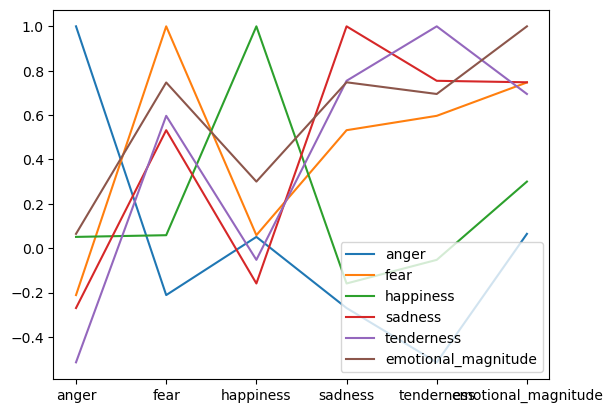

In [38]:
plot_emovectors_corr(df_emo_gtzan)

                        anger      fear  happiness   sadness  tenderness  \
anger                1.000000  0.612372   0.553912 -0.353553   -0.433013   
fear                 0.612372  1.000000   0.150756 -0.096225   -0.353553   
happiness            0.553912  0.150756   1.000000 -0.957427   -0.852803   
sadness             -0.353553 -0.096225  -0.957427  1.000000    0.884538   
tenderness          -0.433013 -0.353553  -0.852803  0.884538    1.000000   
emotional_magnitude  0.369274  0.452267  -0.522727  0.696311    0.586302   

                     emotional_magnitude  
anger                           0.369274  
fear                            0.452267  
happiness                      -0.522727  
sadness                         0.696311  
tenderness                      0.586302  
emotional_magnitude             1.000000  


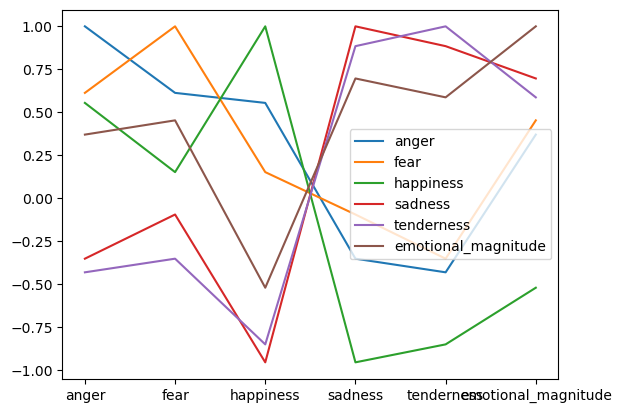

In [39]:
plot_emovectors_corr(df_emo_iv_famous)

                        anger      fear  happiness   sadness  tenderness  \
anger                1.000000  0.294345   0.463517 -0.097642   -0.491525   
fear                 0.294345  1.000000  -0.225043  0.408422    0.294345   
happiness            0.463517 -0.225043   1.000000 -0.439109   -0.471243   
sadness             -0.097642  0.408422  -0.439109  1.000000    0.761605   
tenderness          -0.491525  0.294345  -0.471243  0.761605    1.000000   
emotional_magnitude  0.444312  0.680830   0.122104  0.712678    0.480249   

                     emotional_magnitude  
anger                           0.444312  
fear                            0.680830  
happiness                       0.122104  
sadness                         0.712678  
tenderness                      0.480249  
emotional_magnitude             1.000000  


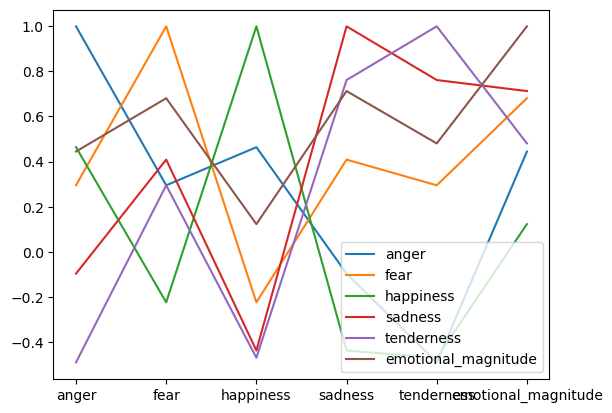

In [40]:
plot_emovectors_corr(df_emo_iv_bob)

                        anger      fear  happiness   sadness  tenderness  \
anger                1.000000  0.138013  -0.196116  0.707107   -0.154303   
fear                 0.138013  1.000000   0.189466  0.487950    0.702764   
happiness           -0.196116  0.189466   1.000000 -0.092450   -0.302614   
sadness              0.707107  0.487950  -0.092450  1.000000    0.436436   
tenderness          -0.154303  0.702764  -0.302614  0.436436    1.000000   
emotional_magnitude  0.565252  0.849218   0.171033  0.845066    0.523322   

                     emotional_magnitude  
anger                           0.565252  
fear                            0.849218  
happiness                       0.171033  
sadness                         0.845066  
tenderness                      0.523322  
emotional_magnitude             1.000000  


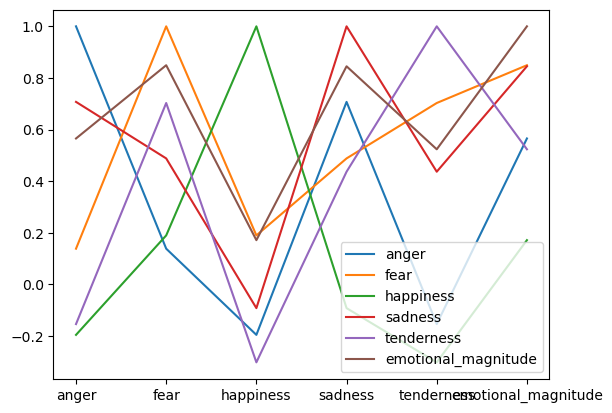

In [41]:
plot_emovectors_corr(df_emo_iv_iv)

In [42]:
from sklearn.preprocessing import StandardScaler


#pull out vectors for some embeddings analysis using clusters and pca
def slice_emovectors(df_emo):
    df_emovector = df_emo[['anger', 'fear', 'happiness', 'sadness', 'tenderness']].copy()
    #print(df_emovector.describe())
    scaled_emovector = StandardScaler().fit_transform(df_emovector) # this isn't working?
    print(scaled_emovector)
    df_scaled_emovector = pd.DataFrame(scaled_emovector, index=df_emovector.index, columns=df_emovector.columns)
    #print(df_scaled_emovector.describe())
    return df_scaled_emovector



In [43]:
df_emovectors_gtzan = slice_emovectors(df_emo_gtzan)
df_emovectors_gtzan.describe()
#df_emo_gtzan.describe()

[[-0.74397269  0.5232765  -0.55449545  0.93803529  0.31575529]
 [ 0.04748762  0.5232765   0.47234798  0.93803529  0.31575529]
 [ 0.83894793  1.54930886  0.47234798  0.93803529  0.31575529]
 [-0.74397269  0.5232765  -1.58133888  2.61309832  2.02254067]
 [ 0.04748762  2.57534121 -0.55449545  0.93803529  1.16914798]
 [-0.74397269  1.54930886  0.47234798 -0.73702773 -0.53763739]
 [ 0.04748762  1.54930886  0.47234798  0.93803529  0.31575529]
 [-0.74397269  1.54930886 -0.55449545  0.10050378  0.31575529]
 [ 0.04748762 -1.52878821 -0.55449545 -0.73702773 -1.39103008]
 [-0.74397269  0.5232765  -1.58133888  0.93803529  0.31575529]
 [ 0.04748762  1.54930886 -1.58133888  0.93803529  0.31575529]
 [-0.74397269  0.5232765   1.4991914  -0.73702773 -0.53763739]
 [-0.74397269 -0.50275585 -0.55449545  0.93803529  0.31575529]
 [-0.74397269 -1.52878821 -0.55449545  0.10050378 -0.53763739]
 [-0.74397269  1.54930886 -1.58133888  1.77556681  1.16914798]
 [-0.74397269  0.5232765   1.4991914  -0.73702773 -0.53

,anger,fear,happiness,sadness,tenderness
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.857226e-17,9.992007e-18,-4.884981e-17,7.494005e-17,9.547918e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.535433e+00,-1.528788e+00,-1.581339e+00,-1.574559e+00,-1.391030e+00
25%,-7.439727e-01,-5.027559e-01,-5.544955e-01,-7.370277e-01,-5.376374e-01
50%,4.748762e-02,1.026032e-02,4.723480e-01,1.005038e-01,3.157553e-01
75%,8.389479e-01,5.232765e-01,4.723480e-01,9.380353e-01,3.157553e-01
max,2.421869e+00,2.575341e+00,2.526035e+00,2.613098e+00,2.875933e+00


In [44]:
df_emovectors_iv_famous = slice_emovectors(df_emo_iv_famous)
df_emovectors_iv_bob = slice_emovectors(df_emo_iv_bob)
df_emovectors_iv_iv = slice_emovectors(df_emo_iv_iv)

[[ 0.          0.         -1.20604538  1.15470054  0.70710678]
 [ 0.         -1.         -0.30151134  0.57735027  1.41421356]
 [ 1.22474487  2.          0.60302269 -0.57735027 -0.70710678]
 [-1.22474487  0.         -1.20604538  1.15470054  0.70710678]
 [-1.22474487 -1.          0.60302269 -1.15470054 -0.70710678]
 [ 1.22474487  0.          1.50755672 -1.15470054 -1.41421356]]
[[-0.55234477  0.72199487 -0.08391814  1.76776695  1.47291939]
 [ 1.47291939  0.72199487  1.76228085 -1.34350288 -1.56497685]
 [-0.55234477  0.72199487 -0.08391814 -0.56568542  0.46028731]
 [-0.55234477 -0.4125685  -1.00701763 -0.56568542  0.46028731]
 [-0.55234477 -0.4125685  -1.00701763  0.98994949  0.46028731]
 [-0.55234477  0.72199487 -1.00701763  0.98994949  0.46028731]
 [-1.56497685 -1.54713187 -0.08391814 -0.56568542  0.46028731]
 [ 0.46028731 -0.4125685   1.76228085  0.21213203  0.46028731]
 [ 1.47291939 -1.54713187  0.83918136 -0.56568542 -1.56497685]
 [-0.55234477 -0.4125685  -0.08391814 -1.34350288 -1.5

              anger          fear     happiness       sadness    tenderness
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02
mean   4.857226e-17  9.992007e-18 -4.884981e-17  7.494005e-17  9.547918e-17
std    1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00
min   -1.535433e+00 -1.528788e+00 -1.581339e+00 -1.574559e+00 -1.391030e+00
25%   -7.439727e-01 -5.027559e-01 -5.544955e-01 -7.370277e-01 -5.376374e-01
50%    4.748762e-02  1.026032e-02  4.723480e-01  1.005038e-01  3.157553e-01
75%    8.389479e-01  5.232765e-01  4.723480e-01  9.380353e-01  3.157553e-01
max    2.421869e+00  2.575341e+00  2.526035e+00  2.613098e+00  2.875933e+00
[[-0.36799449  0.47380167 -0.07181539  0.53777761  0.58798794]
 [ 0.0633638   0.26620726  0.95618181 -0.09891933  0.03240417]]


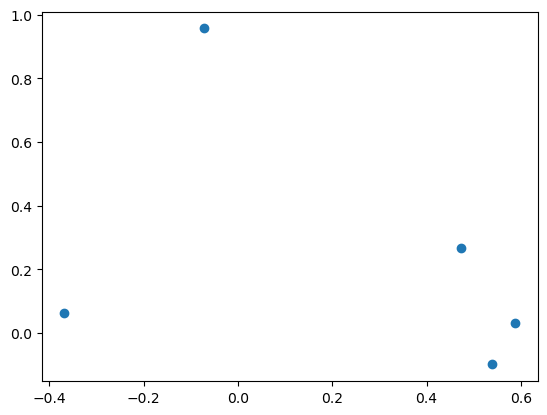

In [45]:
from sklearn.decomposition import PCA
import matplotlib as plt

print(df_emovectors_gtzan.describe())

pca=PCA(n_components = 2)  # for 2d visualisation
pca.fit(df_emovectors_gtzan)
print(pca.components_)
#pca_df = pd.DataFrame(data = pca, columns = ['comp0', 'comp1'])
plt.pyplot.scatter(pca.components_[0], pca.components_[1])

#plt.scattersns.scatterplot(pca_df.comp0, pca_df.comp1, hue = df_emovectors_gtzan.name)
#plt.ylabel('Principal Component 0')
#plt.xlabel('Principal Component 1')
#plt.show()
